### Phys 629, Fall 2023, University of Mississippi


# Lecture 3, Chapter 3: Probability and Statistical Distributions

Material in this lecture and notebook is based upon the Basic Stats portion of G. Richards' "Astrostatistics" class at Drexel University (PHYS 440/540, https://github.com/gtrichards/PHYS_440_540), the Introduction to Probability & Statistics portion of A. Connolly's & Ž. Ivezić's "Astrostatistics & Machine Learning" class at the University of Washington (ASTR 598, https://github.com/dirac-institute/uw-astr598-w18), J. Bovy's mini-course on "Statistics & Inference in Astrophysics" at the University of Toronto (http://astro.utoronto.ca/~bovy/teaching.html), and Stephen R. Taylor (https://github.com/VanderbiltAstronomy/astr_8070_s22). 

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 3. 
- [David Hogg: "Data analysis recipes: Probability calculus for inference"](https://arxiv.org/abs/1205.4446)

***Exercises required for class participation are in <font color='red'>red</font>.***

## Bayes' Rule

We have that 

$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

We can define the **marginal probability** as

$$p(x) = \int p(x,y)dy,$$

where marginal means essentially projecting on to one axis (integrating over the other axis).

We can re-write this as

$$p(x) = \int p(x|y)p(y) dy$$


Since $$p(x|y)p(y) = p(y|x)p(x)$$ we can write that

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$
which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' rule**, which itself is not at all controversial, though its application can be as we'll discuss later.

In the following figure, we have a 2-D distribution in $x-y$ parameter space.  Here $x$ and $y$ are *not* independent as, once you pick a $y$, your values of $x$ are constrained.

The *marginal* distributions are shown on the left and bottom sides of the left panel.  As the equation above says, this is just the integral along the $x$ direction for a given $y$ (left side panel) or the integral along the $y$ direction for a given $x$ (bottom panel).  

The three panels on the right show the **conditional probability** (of $x$) for three $y$ values: $$p(x|y=y_0)$$  These are just "slices" through the 2-D distribution.

![http://www.astroml.org/_images/fig_conditional_probability_1.png](http://www.astroml.org/_images/fig_conditional_probability_1.png)

## Example: Lego's 

An example with Lego's (it's awesome):
[https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego)

## Example: Monty Hall Problem (or "Deal Or No Deal")

You are playing a game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car? 

<font color='red'>ANSWER =1/2 or 50%</font>

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick), making sure to select one with a goat.  The host offers you the opportunity to switch doors.  Do you?
 
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)





Now you are back at the 2 door situation.  But what can you make of your prior information? Let's break this down.

* Probability of car behind **Door 1** $= 1/3$
* Probability of car behind **Doors 2 or 3** $= 2/3$

But if the host opens **Door 3** to show a goat, you now have prior information to update your probability of the car being behind **Door 2**. The probability of the car behind **Door 1** is still $1/3$, but the total probability must sum to unity, and you only have **Door 2** left. Hence,

* With prior knowledge of **Door 3** containing a goat, the probability of car behind **Door 2** $=2/3$.


So, ***switching doubles your chances***. You should always switch!! But only because you had prior information.  If someone walked in after the "bad" door was opened, then their probability of winning is the expected $1/2$.

Try it:
https://betterexplained.com/articles/understanding-the-monty-hall-problem/

<font color='red'>Add a screen shot showing your results after playing the Monty Hall game above 10 times, either with "pick and hold" or "pick and switch". You can insert an image in Jupyter by clicking "Edit", then "Insert Image" down at the bottom. Run the cell to get the image to appear.</font>


This is the outcome of 100 runs with switching.
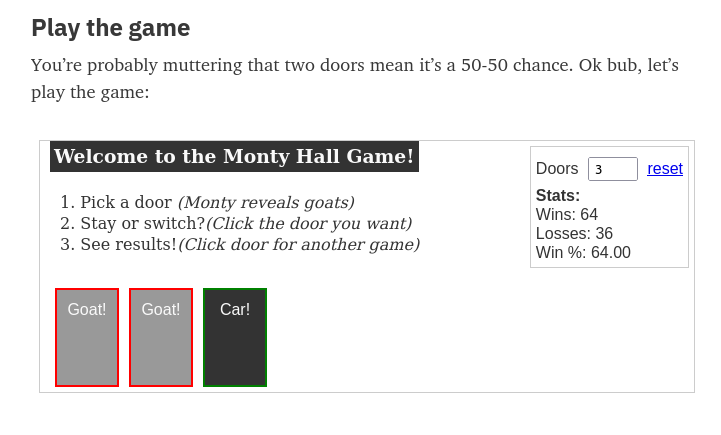

This actually becomes easier to understand as $N$ increases. For $N$ choices, revealing $N-2$ "answers" doesn't change the probability of your original door choice. It is still $\frac{1}{N}$.  But it *does* change the probability of your knowledge of the *other final* remaining choice by $N-1$ and it is $\frac{N-1}{N}$. Therefore, by switching, you increase your chance of winning by a factor of $(N-1)$. Shocking, but true. 

* In the 3-door example, switching doubles your chance of winning (from $1/3$ to $2/3$). 
* In a 100-door example, switching increases your chance of winning by a factor of $99$.

This is an example of the use of *conditional* probability, where we have $p(A|B) \ne p(A)$.

[Take a look in the book for the proof.](figures/grab1.tiff) 

## Example: Contingency Table

We can also use Bayes' rule to learn something about false positives and false negatives.

Let's say that we have a test for a disease.  The test can be positive ($T=1$) or negative ($T=0$) and one can either have the disease ($D=1$) or not ($D=0$).  So, there are 4 possible combinations:
$$T=0; D=0 \;\;\;  {\rm true \; negative}$$
$$T=0; D=1 \;\;\; {\rm false \; negative}$$
$$T=1; D=0 \;\;\; {\rm false \; positive}$$
$$T=1; D=1 \;\;\; {\rm true \; positive}$$

All else being equal, you have a 50% chance of being misdiagnosed.  Not good!  But the probability of disease and the accuracy of the test presumably are not random.

If the rates of false positive and false negative are:
$$p(T=1|D=0) = \epsilon_{\rm FP}$$
$$p(T=0|D=1) = \epsilon_{\rm FN}$$

then the true positive and true negative rates are just:
$$p(T=0| D=0) = 1-\epsilon_{\rm FP}$$
$$p(T=1| D=1) = 1-\epsilon_{\rm FN}$$

Let's assume that $\epsilon_{\rm FP}=0.02$ and $\epsilon_{\rm FN}=0.001$. 

In graphical form this 2x2 p(T=0 or 1|D=0 or 1) matrix is:
![http://www.astroml.org/_images/fig_contingency_table_1.png](http://www.astroml.org/_images/fig_contingency_table_1.png)

If we have a **prior** regarding how likely the disease is, we can take this into account.

$$p(D=1)=\epsilon_D$$

and then $p(D=0)=1-\epsilon_D$. Say, $\epsilon_D$ = 0.01. 

Now assume that a person tested positive. What is the probability that this person has the disease? Is it 98% 
because $\epsilon_{\rm FP}=0.02$?

We can't just read $p(D=1|T=1)$ off the table because the table entry is the conditional probability of the *test* given the *data*, $p(T=1|D=1)$. What we want is the conditional probability of the *data* given the *test*, that is, $p(D=1|T=1)$.

Bayes' rule then can be used to help us determine how likely it is 
that you have the disease if you tested positive:

$$p(D=1|T=1) = \frac{p(T=1|D=1)p(D=1)}{p(T=1)},$$

where $$p(T=1) = p(T=1|D=0)p(D=0) + p(T=1|D=1)p(D=1).$$

So
$$p(D=1|T=1) = \frac{(1 - \epsilon_{FN})\epsilon_D}{\epsilon_{FP}(1-\epsilon_D) + (1-\epsilon_{FN})\epsilon_D} \approx \frac{\epsilon_D}{\epsilon_{FP}+\epsilon_D}$$

That means that to get a reliable diagnosis, we need $\epsilon_{FP}$ to be quite small.  (Because you *want* the probability to be close to unity if you test positive, otherwise it is a *false* positive).

In our example, we have a disease rate of 1% ($\epsilon_D = 0.01$) and a false positive rate of 2% ($\epsilon_{\rm FP}=0.02$).  

So we have
$$p(D=1|T=1) = \frac{0.01}{0.02+0.01} = 0.333$$

Then in a sample of, e.g.,  1000 people, 10 people will *actually* have the disease $(1000*0.01)$, but another 20 $(1000*0.02)$ will test positive! 

Therefore, in that sample of 30 people who tested positive, only 1/3 has the disease
(not 98%!). 

Same math, with often surprising results, applies to DNA tests of murder suspects...

### COVID-19 example

Let's assume that current estimates of the rate of **false positive** tests for COVID-19 are between $\sim 2.0\%$.

Estimates of the rate of **false negative** swab tests for COVID-19 are $\sim12\%$.

Current daily average infection count per 100,000 in Nearby County is 164. 

Let's assume that translates to a current **disease probability** of $164/100000 = 0.164\%$.

<font color='red'>Plug in some of these numbers to estimate $p(D=1|T=1)$ for COVID-19 in Nearby County.</font>

<font color='red'>ANSWER here--></font>

If we use the same process as above, we get
$$p(D=1|T=1) = \frac{(1 - \epsilon_{FN})\epsilon_D}{\epsilon_{FP}(1-\epsilon_D) + (1-\epsilon_{FN})\epsilon_D} \approx \frac{\epsilon_D}{\epsilon_{FP}+\epsilon_D}$$

This comes out to be a simple calculation where we plug in the given values above. This is then just
$$p(D=1|T=1) = \frac{(1 - \epsilon_{FN})\epsilon_D}{\epsilon_{FP}(1-\epsilon_D) + (1-\epsilon_{FN})\epsilon_D} = (\frac{(1-0.12)*0.164}{(0.2*(1-0.164)+(1-0.12)*0.164}\approx 89.6\%$$ 


If we compare this to the simplified version, it comes out to be 
$$\approx \frac{\epsilon_D}{\epsilon_{FP}+\epsilon_D}=\frac{0.164}{0.02+0.164} \approx 89.1\%$$

Both methods provide very similar answers, but clearly the first has a higher degree of accuracy.

## Transformations of random variables

If $x$ is a random variable then $f(x)$ is also a random variable for any function $f$.

To transform probability distributions when taking functions of random variables, we can simply use conservation of dimensionless probability, i.e.,

$$\mathrm{Prob}(x, x+dx) = \mathrm{Prob}(y, y+dy)$$

$$p(x)dx = p(y)dy.$$ 

where $y = f(x)$.

Thus, $$p(y) = \left|\frac{dx}{dy}\right| p(x)$$

**EXAMPLE**

* Let $x$ be a random variable drawn from a uniform distribution between $0$ and $1$. So $p(x) = 1/(1-0) = 1$.  
* Let's transform to $y = e^x$.
* So $p(y) = \left|dy/dx\right|^{-1}p(x) = 1/y$

![https://www.astroml.org/_images/fig_transform_distribution_1.png](https://www.astroml.org/_images/fig_transform_distribution_1.png)